In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Datasets

## India 2014

### Agriculture

In [316]:
inAgri = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Agriculture/india_agriculture_2014.xls')

In [317]:
inAgri.head(1)

,id,country,submission_id,form_created,form_submitted,lat,lng,address,type,land_use,...,branded,infrastructure_type,infrastructure_specific,state,district,category,geom,gaul_2014_adm0,gaul_2014_adm1,gaul_2014_adm2
0,1539,India,1392014034076_Sunny,2/10/2014 11:58,2/10/2014 12:03,25.56872,84.67436,"Gola Road, ARA",Agro-dealers,Rural,...,Yes,Permanent shop,NaN,Bihar,Bhojpur,Arrah,0101000020E6100000C16ED8B6282B5540C49448A29791...,118.0,2434.0,33127.0


In [125]:
inAgri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 22 columns):
id                         65535 non-null int64
country                    65535 non-null object
submission_id              65535 non-null object
form_created               65535 non-null object
form_submitted             65535 non-null object
lat                        65535 non-null float64
lng                        65535 non-null float64
address                    65534 non-null object
type                       65535 non-null object
land_use                   65535 non-null object
name                       65528 non-null object
number_employees           54884 non-null float64
branded                    30469 non-null object
infrastructure_type        33097 non-null object
infrastructure_specific    210 non-null object
state                      65535 non-null object
district                   65535 non-null object
category                   65535 non-null object
geom     

In [126]:
columns_of_interest = ['country','lat','lng','type','land_use','state','category']
inAgri_new = inAgri[columns_of_interest]
inAgri_new.head()

,country,lat,lng,type,land_use,state,category
0,India,25.56872,84.67436,Agro-dealers,Rural,Bihar,Arrah
1,India,26.22088,81.23368,Agro-dealers,Urban,Uttar Pradesh,Raebareli
2,India,26.12233,81.17151,Agro-dealers,Rural,Uttar Pradesh,Raebareli
3,India,29.69170,77.67775,Market Locations,Urban,Uttar Pradesh,Deoband
4,India,26.99658,77.95907,Market Locations,Rural,Uttar Pradesh,Saiyan


** Agriculture types: **

In [137]:
inAgri['type'].value_counts()

Agro-dealers                                     30469
Processors/value addition points                 18801
Market Locations                                  5487
Government Vets                                   2891
Private sector Agricultural service providers     2628
Artificial Insemination Centres                   1947
Dairy Processors                                  1599
Day old chick hatcheries                           900
Farmer Organisations and Cooperatives              404
Dairy chilling plants                              314
National/Regional/State Research Stations           61
Warehouse/Storage/Aggregation Centres               34
Name: type, dtype: int64

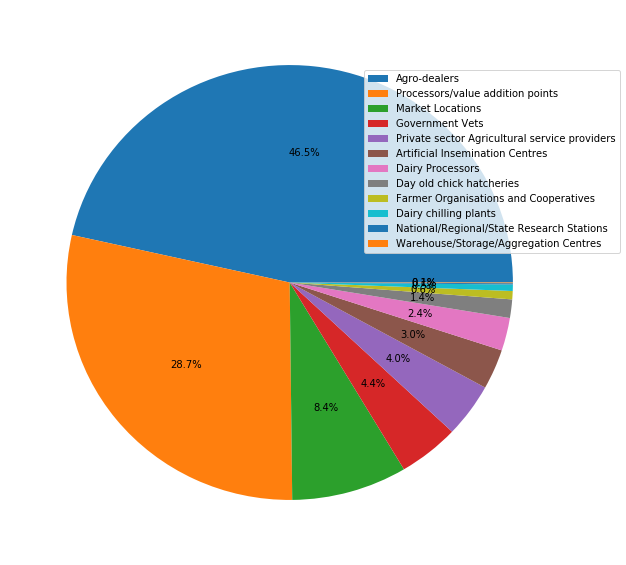

In [196]:
counts = inAgri['type'].value_counts()
labels = counts.index.tolist()
plt.figure(figsize=(10,10))
plt.pie(counts, autopct='%1.1f%%')
plt.legend(labels, loc='upper right',bbox_to_anchor=(1.1, 0.9));

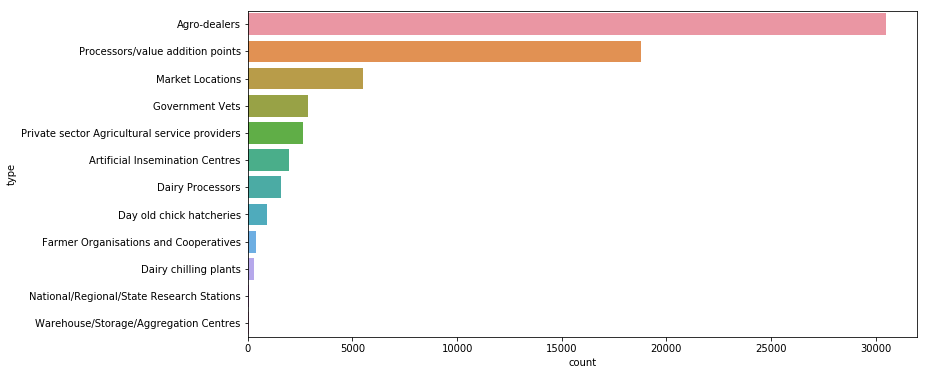

In [140]:
plt.figure(figsize=(12,6))
sns.countplot(y='type',data=inAgri, order=labels);

** Land type: **

In [133]:
inAgri_new['land_use'].value_counts()

Rural    59608
Urban     5927
Name: land_use, dtype: int64

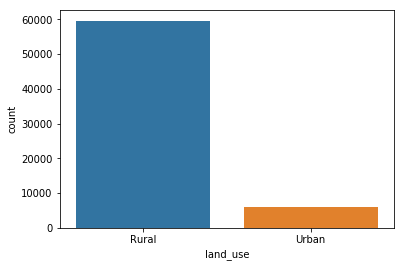

In [134]:
sns.countplot(x='land_use',data=inAgri_new);

** States: **

In [143]:
inAgri['state'].value_counts()

Uttar Pradesh    54907
Bihar            10628
Name: state, dtype: int64

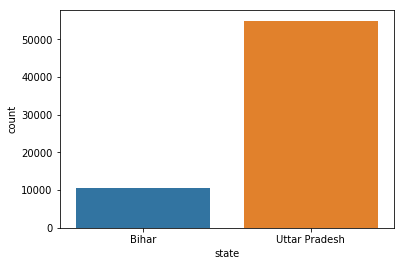

In [144]:
sns.countplot(x='state',data=inAgri);

In [169]:
inAgr_Bihar = inAgri_new[inAgri_new['state'] == 'Bihar']
inAgr_Uttar = inAgri_new[inAgri_new['state'] == 'Uttar Pradesh']

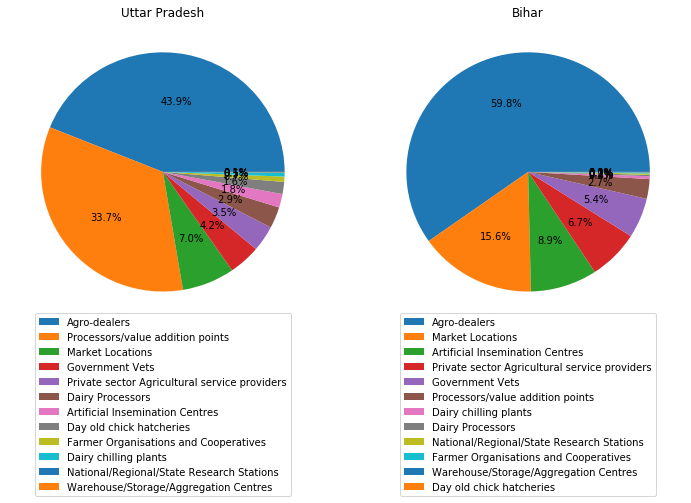

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(12,5.5))

counts = inAgr_Uttar['type'].value_counts()
labels = counts.index.tolist()
axes[0].pie(counts, autopct='%1.1f%%')
axes[0].set_title("Uttar Pradesh")
axes[0].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6))

counts = inAgr_Bihar['type'].value_counts()
labels = counts.index.tolist()
axes[1].pie(counts, autopct='%1.1f%%')
axes[1].set_title("Bihar")
axes[1].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6));

### Read and deal with maps

In [219]:
#Import libs
import geopandas as gpd
from iso3166 import countries

** Download India gadm36 shapefiles from [http://www.gadm.org/download](http://www.gadm.org/download) **

In [221]:
#After unzipping map for India, read in file
inmap = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_IND_shp/gadm36_IND_1.shp')

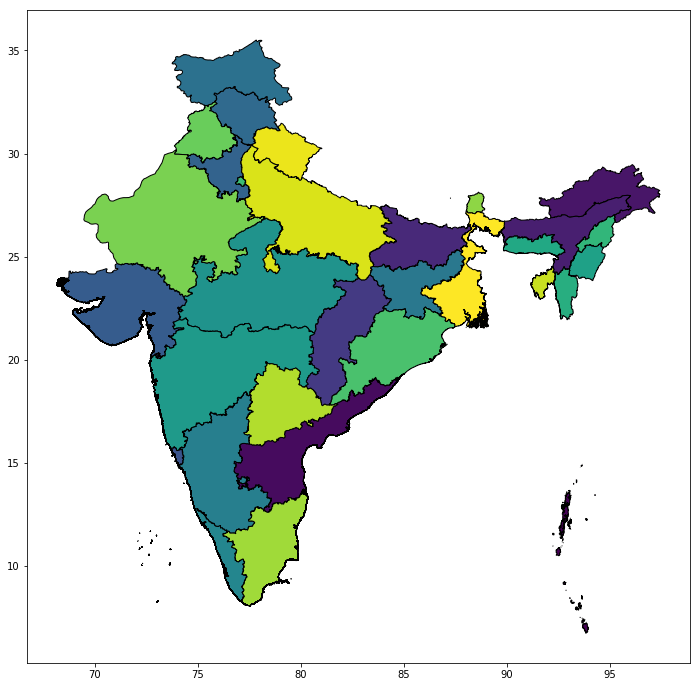

In [249]:
inmap.plot(figsize=(12,12), edgecolor='black', cmap='viridis')

In [255]:
# Get Uttar Pradesh and Bihar states
inmap_state = inmap[(inmap['NAME_1'] == 'Uttar Pradesh') | (inmap['NAME_1'] == 'Bihar')]

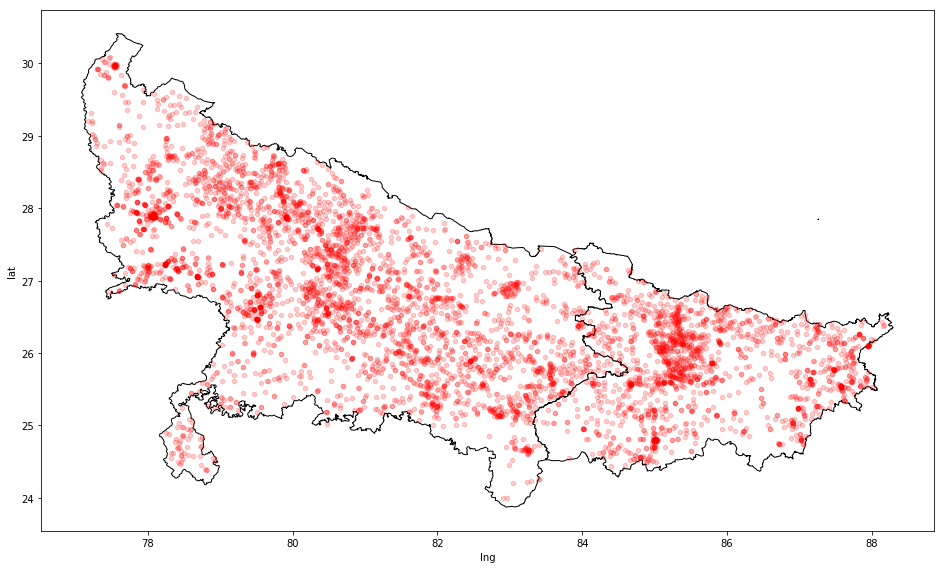

In [315]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

inmap_state.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Market Locations'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', alpha=0.2)